In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rc("font", family="Malgun Gothic")

In [15]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [6]:
tips.groupby("day").count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [8]:
tips.groupby("day")["total_bill"].count()

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64

<BarContainer object of 4 artists>

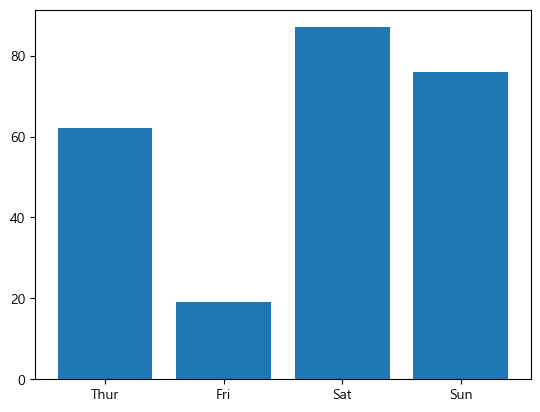

In [24]:
group = tips.groupby("day").count()["total_bill"]
x = list(group.index)
y = list(group)
x, y
plt.bar(x, y)

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

['Thur', 'Fri', 'Sat', 'Sun'] [1096.33, 325.88, 1778.4, 1627.16]


<Axes: >

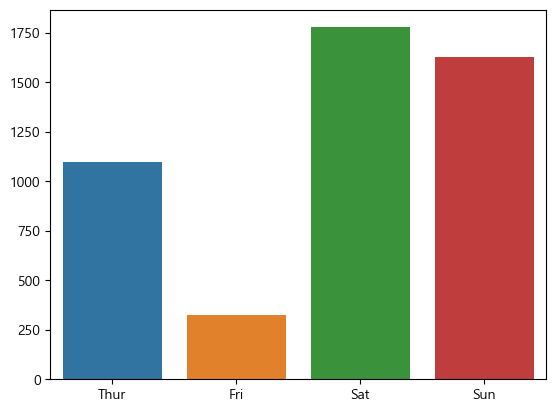

In [30]:
group = tips.groupby("day").sum()["total_bill"]

print( group )
print()

x = list( group.index )
y = list( group )
print(x, y)

sns.barplot( x=x, y=y )

- https://seaborn.pydata.org/tutorial/color_palettes.html

In [38]:
tips.groupby("day").describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

<Axes: xlabel='day'>

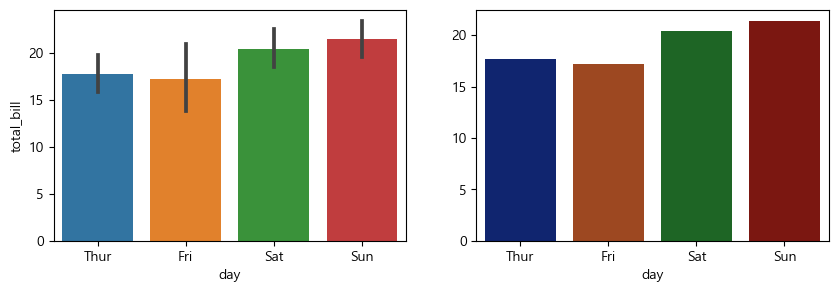

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.barplot(x="day", y="total_bill", data=tips, ax=axes[0])

data = tips.groupby("day")["total_bill"].describe()["mean"]
x_data = data.index
y_data = list(data)

sns.barplot(x=x_data, y=y_data, palette="dark", ax=axes[1])

### relplot

In [43]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


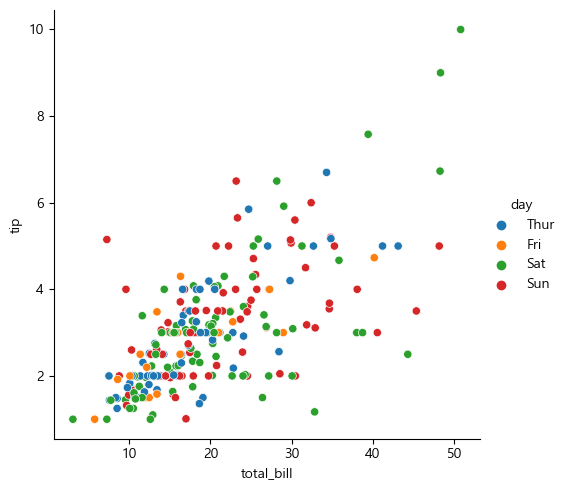

In [46]:
# 양의 상관관계 : total_bill이 증가 시 tip도 증가하는 형태

sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

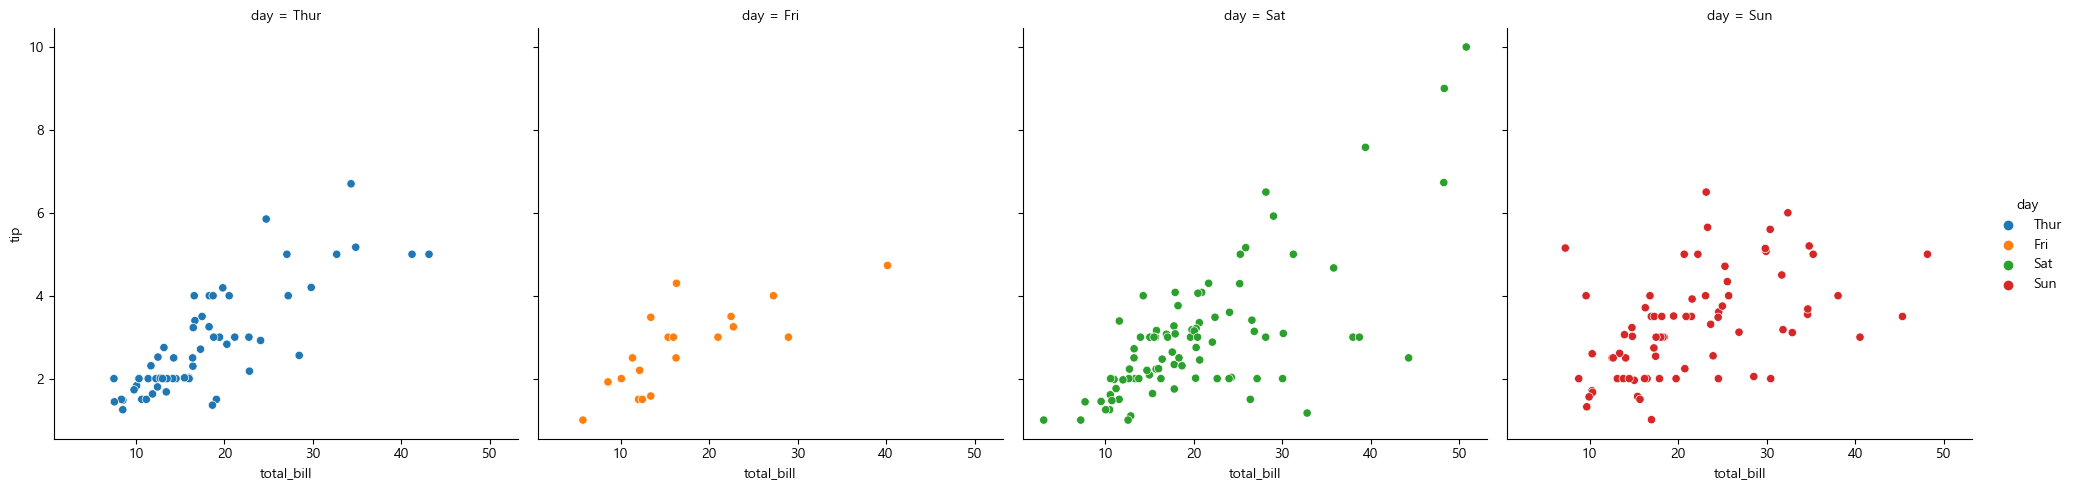

In [47]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips, col="day")

Text(0.5, 1.0, 'Scatter Plot')

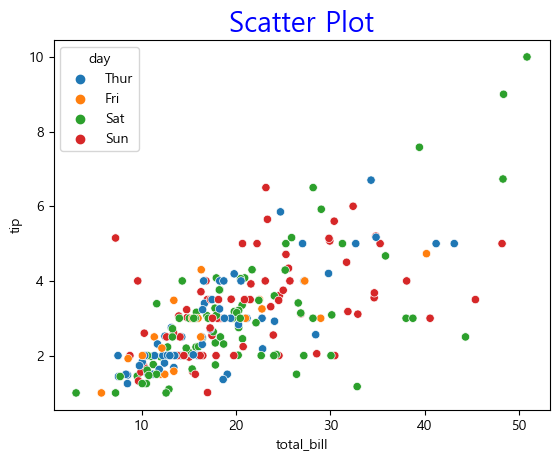

In [50]:
g = sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)
g.set_title("Scatter Plot", fontsize=20, color="blue")

<Axes: xlabel='total_bill', ylabel='tip'>

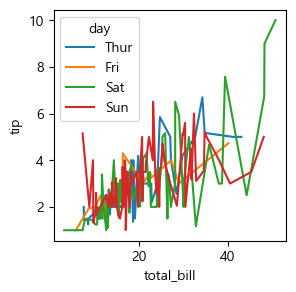

In [54]:
plt.subplots( figsize=(3, 3) )
sns.lineplot(x="total_bill", y="tip", hue="day", data=tips)

In [58]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'DistPlot')

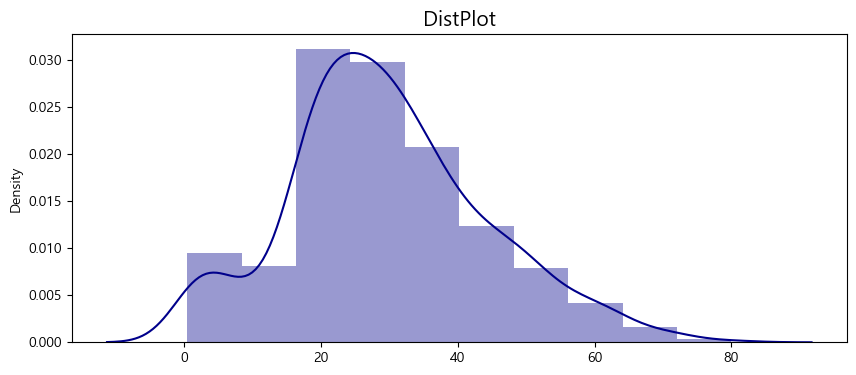

In [60]:
fig, ax = plt.subplots(figsize=(10, 4))
g = sns.distplot(x=titanic["age"], color="darkblue", bins=10)
ax.set_title("DistPlot", fontsize=15)

Text(0.5, 1.0, 'HistPlot')

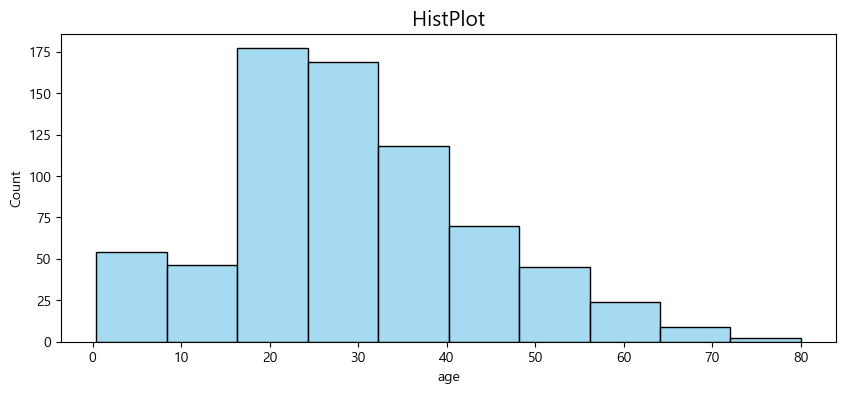

In [62]:
fig, ax = plt.subplots(figsize=(10, 4))
g = sns.histplot(x=titanic["age"], color="skyblue", bins=10)
ax.set_title("HistPlot", fontsize=15)

<Axes: xlabel='day', ylabel='total_bill'>

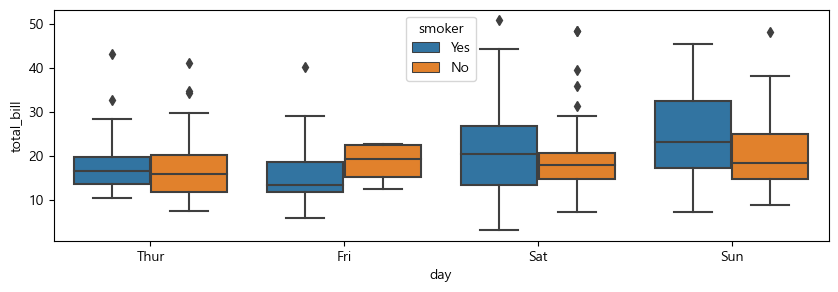

In [63]:
plt.subplots(figsize=(10, 3))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

In [64]:
# 상관 관계를 표현
# 0.7이상 시 어느정도 관계가 있으며, 0.3 이하 시 관계가 없다고 표현
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

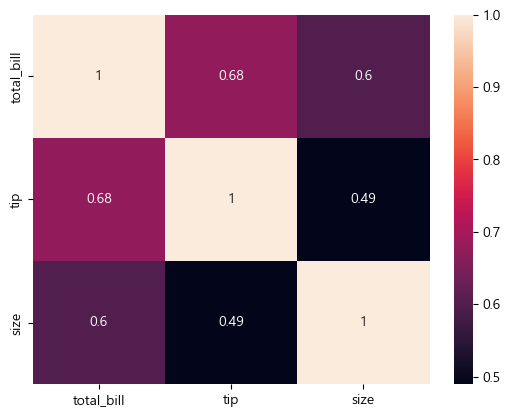

In [66]:
sns.heatmap(tips.corr(), annot = True)